In [0]:
!pip install -q gpt-2-simple
!pip install opencv-python

import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import gpt_2_simple as gpt2
import tensorflow as tf
from tensorflow.python.framework import ops
import os
import time
import re
import shutil
import pickle

WARNING: You are using pip version 21.0.1; however, version 22.0.4 is available.
You should consider upgrading via the '/databricks/python3/bin/python -m pip install --upgrade pip' command. 
Collecting opencv-python
 Downloading opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
 | 10 kB 32.1 MB/s eta 0:00:02 | | 20 kB 38.5 MB/s eta 0:00:02 | | 30 kB 30.9 MB/s eta 0:00:02 | | 40 kB 19.2 MB/s eta 0:00:04 | | 51 kB 15.6 MB/s eta 0:00:04 | | 61 kB 18.0 MB/s eta 0:00:04 | | 71 kB 19.4 MB/s eta 0:00:04 | | 81 kB 19.2 MB/s eta 0:00:04 | | 92 kB 21.0 MB/s eta 0:00:03 | | 102 kB 19.8 MB/s eta 0:00:04 | | 112 kB 19.8 MB/s eta 0:00:04 | | 122 kB 19.8 MB/s eta 0:00:04 | | 133 kB 19.8 MB/s eta 0:00:04 | | 143 kB 19.8 MB/s eta 0:00:04 | | 153 kB 19.8 MB/s eta 0:00:04 | | 163 kB 19.8 MB/s eta 0:00:04 | | 174 kB 19.8 MB/s eta 0:00:04 | | 184 kB 19.8 MB/s eta 0:00:04 | | 194 kB 19.8 MB/s eta 0:00:04 | | 204 kB 19.8 MB/s eta 0:00:04 |▏ | 215 kB 19.8 MB/s eta 0:00:04 |▏ | 225 kB 19.8 MB/s eta 0:00:04 |▏ | 235 kB 19.8 MB/s eta 0:00:04 |▏ | 245 kB 19.8 MB/s eta 0:00:04 |▏ | 256 kB 19.8 MB/s eta 0:00:04 |▏ | 266 kB 19.8 MB/s eta 0:00:04 |▏ | 276 kB 19.8 MB/s eta 0:00:04 |▏ | 286 kB 19.8 MB/s eta 0:00:04 |▏ | 296 kB 19.8 MB/s eta 0:00:04 |▏ | 307 kB 19.8 MB/s eta 0:00:04 |▏ | 317 kB 19.8 MB/s eta 0:00:04 |▏ | 327 kB 19.8 MB/s eta 0:00:04 |▏ | 337 kB 19.8 MB/s eta 0:00:04 |▏ | 348 kB 19.8 MB/s eta 0:00:04 |▏ | 358 kB 19.8 MB/s eta 0:00:04 |▏ | 368 kB 19.8 MB/s eta 0:00:04 |▏ | 378 kB 19.8 MB/s eta 0:00:04 |▏ | 389 kB 19.8 MB/s eta 0:00:04 |▏ | 399 kB 19.8 MB/s eta 0:00:04 |▏ | 409 kB 19.8 MB/s eta 0:00:04 |▏ | 419 kB 19.8 MB/s eta 0:00:04 |▎ | 430 kB 19.8 MB/s eta 0:00:04 |▎ | 440 kB 19.8 MB/s eta 0:00:04 |▎ | 450 kB 19.8 MB/s eta 0:00:04 |▎ | 460 kB 19.8 MB/s eta 0:00:04 |▎ | 471 kB 19.8 MB/s eta 0:00:04 |▎ | 481 kB 19.8 MB/s eta 0:00:04 |▎ | 491 kB 19.8 MB/s eta 0:00:04 |▎ | 501 kB 19.8 MB/s eta 0:00:04 |▎ | 512 kB 19.8 MB/s eta 0:00:04 |▎ | 522 kB 19.8 MB/s eta 0:00:04 |▎ | 532 kB 19.8 MB/s eta 0:00:04 |▎ | 542 kB 19.8 MB/s eta 0:00:04 |▎ | 552 kB 19.8 MB/s eta 0:00:04 |▎ | 563 kB 19.8 MB/s eta 0:00:04 |▎ | 573 kB 19.8 MB/s eta 0:00:04 |▎ | 583 kB 19.8 MB/s eta 0:00:04 |▎ | 593 kB 19.8 MB/s eta 0:00:04 |▎ | 604 kB 19.8 MB/s eta 0:00:04 |▎ | 614 kB 19.8 MB/s eta 0:00:04 |▎ | 624 kB 19.8 MB/s eta 0:00:04 |▍ | 634 kB 19.8 MB/s eta 0:00:04 |▍ | 645 kB 19.8 MB/s eta 0:00:04 |▍ | 655 kB 19.8 MB/s eta 0:00:04 |▍ | 665 kB 19.8 MB/s eta 0:00:04 |▍ | 675 kB 19.8 MB/s eta 0:00:04 |▍ | 686 kB 19.8 MB/s eta 0:00:04 |▍ | 696 kB 19.8 MB/s eta 0:00:04 |▍ | 706 kB 19.8 MB/s eta 0:00:04 |▍ | 716 kB 19.8 MB/s eta 0:00:04 |▍ | 727 kB 19.8 MB/s eta 0:00:04 |▍ | 737 kB 19.8 MB/s eta 0:00:04 |▍ | 747 kB 19.8 MB/s eta 0:00:04 |▍ | 757 kB 19.8 MB/s eta 0:00:04 |▍ | 768 kB 19.8 MB/s eta 0:00:04 |▍ | 778 kB 19.8 MB/s eta 0:00:04 |▍ | 788 kB 19.8 MB/s eta 0:00:04 |▍ | 798 kB 19.8 MB/s eta 0:00:04 |▍ | 808 kB 19.8 MB/s eta 0:00:04 |▍ | 819 kB 19.8 MB/s eta 0:00:04 |▍ | 829 kB 19.8 MB/s eta 0:00:04 |▍ | 839 kB 19.8 MB/s eta 0:00:04 |▌ | 849 kB 19.8 MB/s eta 0:00:04 |▌ | 860 kB 19.8 MB/s eta 0:00:04 |▌ | 870 kB 19.8 MB/s eta 0:00:04 |▌ | 880 kB 19.8 MB/s eta 0:00:04 |▌ | 890 kB 19.8 MB/s eta 0:00:04 |▌ | 901 kB 19.8 MB/s eta 0:00:04 |▌ | 911 kB 19.8 MB/s eta 0:00:04 |▌ | 921 kB 19.8 MB/s eta 0:00:04 |▌ | 931 kB 19.8 MB/s eta 0:00:04 |▌ | 942 kB 19.8 MB/s eta 0:00:04 |▌ | 952 kB 19.8 MB/s eta 0:00:04 |▌ | 962 kB 19.8 MB/s eta 0:00:04 |▌ | 972 kB 19.8 MB/s eta 0:00:04 |▌ | 983 kB 19.8 MB/s eta 0:00:04 |▌ | 993 kB 19.8 MB/s eta 0:00:04 |▌ | 1.0 MB 19.8 MB/s eta 0:00:04 |▌ | 1.0 MB 19.8 MB/s eta 0:00:04 |▌ | 1.0 MB 19.8 MB/s eta 0:00:04 |▌ | 1.0 MB 19.8 MB/s eta 0:00:04 |▌ | 1.0 MB 19.8 MB/s eta 0:00:04 |▋ | 1.1 MB 19.8 MB/s eta 0:00:04 |▋ | 1.1 MB 19.8 MB/s eta 0:00:04 |▋ | 1.1 MB 19.8 MB/s eta 0:00:04 |▋ | 1.1 MB 19.8 MB/s eta 0:00:0

In [0]:
gpt2.download_gpt2(model_name="124M")

In [0]:
input_image = glob.glob("/dbfs/FileStore/nft-hackathon/punks_all.png")[0]
output_images = "/dbfs/FileStore/nft-hackathon/small_punks"

image = cv2.imread(input_image, cv2.IMREAD_UNCHANGED)

idx_i = 0
for i in range(0, 2400, 24):
    idx_j = 0
    for j in range(0, 2400, 24):
        punk = image[i:i+24,j:j+24]
        cv2.imwrite(os.path.join(output_images, 'punk_' + str(idx_j + 100*idx_i) + '.png'), punk)
        idx_j += 1
    idx_i += 1

In [0]:
img = cv2.imread(input_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
all_rgb_codes = img.reshape(-1, img.shape[-1])
unique_rgbs = np.unique(all_rgb_codes, axis=0, return_counts = False)

rgb_color = [str(rgb) for rgb in unique_rgbs.tolist()]
code = [str(i).zfill(3) for i in range(0, 222)]
encode_map = dict(zip(rgb_color, code))
decode_map = dict(zip(code, rgb_color))

with open('/dbfs/FileStore/nft-hackathon/decode.pkl', 'wb') as handle:
    pickle.dump(decode_map, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
output = ''
input_folder  = "/dbfs/FileStore/nft-hackathon/small_punks"

for f in os.listdir(input_folder):
    ext = f.split('.')[-1]
    if ext not in ['png', 'gif', 'jpg', 'jpeg']:
        continue
        
    path = '%s/%s' % (input_folder, f)
    image = Image.open(path).convert('RGBA')
    pixels = image.load()
    width = image.size[0]
    height = image.size[1]

    lines = []
    for y in range(height):
        padLength = len(str(height))
        padded = str(y).zfill(padLength)
        split = [padded + 'd']

        for x in range(width):
            color = pixels[x, y][:3]

            rgb = str(list(color))
            value = encode_map[rgb]

            split.append(value)

        lines.append(' '.join(split))

    output += '\n'.join(lines)
    output += '\n'

with open('/dbfs/FileStore/nft-hackathon/all-images.txt', 'w') as output_file:
    output_file.write(output)

In [0]:
# @values

checkpoint_folder = 'checkpoints'
run_name = 'cryptopunks_2_run'
steps = 2000

if not os.path.exists('/dbfs/FileStore/nft-hackathon/%s' % checkpoint_folder):
    os.makedirs('/dbfs/FileStore/nft-hackathon/%s' % checkpoint_folder)

from tensorflow.python.framework import ops
ops.reset_default_graph()

session = gpt2.start_tf_sess()

In [0]:
session = gpt2.reset_session(session)
gpt2.finetune(session,
    dataset='all-images.txt',
    model_name='124M',
    steps=steps,
    restore_from='latest',
    run_name=run_name,
    print_every=20,
    sample_every=500,
    save_every=500,
    )

shutil.copytree( 'checkpoint/%s' % run_name, '/dbfs/FileStore/nft-hackathon/%s/%s' % (checkpoint_folder, run_name))

In [0]:
def createImage(text, path):
    lines = text.split('\n')

    imageWidth = 24
    imageHeight = 24

    pixels = []
    for y in range(imageHeight):
        for x in range(imageWidth):
            pixels.append((100, 132, 150, 255))

    for line in lines:
        split = line.split(' ')

        marker = split[0]
        match = re.search("^([0-9]+)([d])$", marker)

        if match:
            groups = match.groups()
            index = int(groups[0])

            for x in range(len(split) - 1):
                s = split[x + 1]
                match = re.search("^[0-9][0-9][0-9]$", s)
                if not match:
                    s = '079'

                rgb = eval(decode_map[s])

                i = (index * imageWidth) + x
                pixels[i] = (rgb[0], rgb[1], rgb[2], 255)

    image = Image.new('RGBA', (imageWidth, imageHeight))
    image.putdata(pixels)
    image.save(path)


def blankLines():
    lines = []

    for i in range(0, height):
        lines.append('')

    return lines

sess = None

In [0]:
decoder = 'decode.pkl'
with open('/dbfs/FileStore/nft-hackathon/%s' % decoder, 'rb') as handle:
    decode_map = pickle.load(handle)

In [0]:
output_folder = 'output_punks_new_model_final'
generate_count = 100
temperature = 0.98

In [0]:
if not os.path.exists('/dbfs/FileStore/nft-hackathon/%s' % output_folder):
    os.makedirs('/dbfs/FileStore/nft-hackathon/%s' % output_folder)

prefix = """
00d 000 000 000 000 000 020 079 000 000 000 000 079 000 000 020 079 020 000 079 000 000 000 000 000
01d 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000
"""

for img in range(0, generate_count):
    print("punk number: %i" % img)
    
    if not sess:
        sess = gpt2.start_tf_sess()
    else:
        sess = gpt2.reset_session(sess)
    
    gpt2.load_gpt2(sess, run_name=run_name)
    width = 24
    height = 24
    
    text = gpt2.generate(sess, run_name=run_name, prefix=prefix, temperature=temperature, return_as_list=True)[0]
    print("\nGPT-2 text output: \n")
    print(text)

    lines = text.split('\n')
    section = '\n'.join(lines[20:])
    newText = gpt2.generate(sess, run_name=run_name, prefix=section, temperature=temperature, return_as_list=True)[0]
    newLines = newText.split('\n')
    lines = lines[:20] + newLines
    splits = [line.split(' ') for line in lines]

    indices = [split[0] for split in splits]
    idx = indices.index('00d')

    for i, split in enumerate(splits):
        if len(split) < width + 1:
            while len(split) < width + 1:
                split.append('079')

            lines[i] = ' '.join(split)
        else:
            split = split[:width+1]
            lines[i] = ' '.join(split)
    
    output = '\n'.join(lines[:height])
    print("\nSaving output: \n")
    filename = '%i' % int(time.time())
    createImage(output, '/dbfs/FileStore/nft-hackathon/%s/%s.png' % (output_folder, filename))
    print('\nsaved !\n')

In [0]:
#Load Image 
generated_punks_final = glob.glob("/dbfs/FileStore/nft-hackathon/output_punks_new_model_final/*")

In [0]:
def show_image(idx,generated_punks_final):
    X = np.asarray(Image.open(generated_punks_final[idx])).copy()
    X[0:1:] = np.full((1,24,4),[ 0, 0, 0, 255])
    im = Image.fromarray(X)
    plt.axis('off')
    plt.imshow(im)

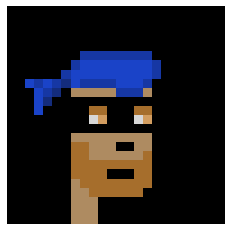

In [0]:
show_image(60,generated_punks_final)